#### 1. OpenCV
1. Загрузите вашу любимую фотографию
2. Примените фильтры Гаусса и Собеля с различными размерами ядер к ней. В чем отличия?
3. Найдите в документации OpenCV любой другой фильтр, не рассмотренный на занятии. Для чего он нужен? Примените к изображению.
4. Сохраните получившееся изображение.



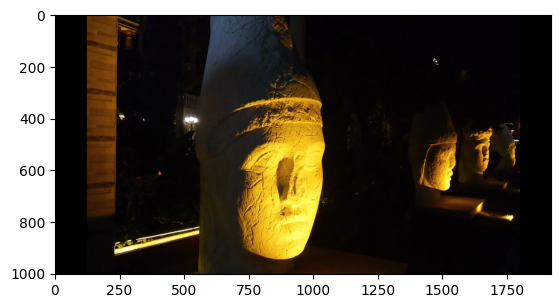

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img2.png')[:,:,::-1]
plt.imshow(img)

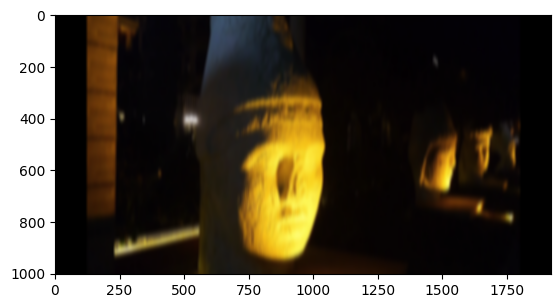

In [2]:
img_gous = cv2.GaussianBlur(img,(11,55),11)
plt.imshow(img_gous)

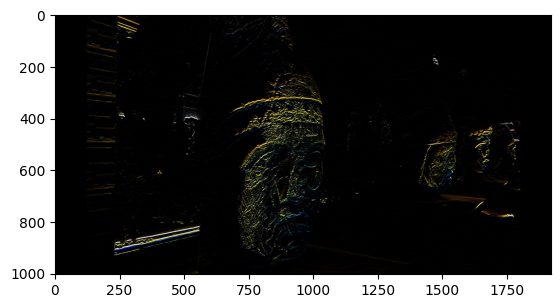

In [3]:
img_sobel = cv2.Sobel(img,cv2.CV_8U,0,1)
plt.imshow(img_sobel,cmap='gray')

##### sepFilter2D - фильтр

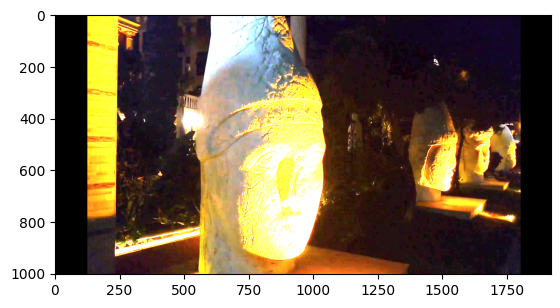

In [4]:
img_2d = cv2.sepFilter2D(img,cv2.CV_8U,3,2)
plt.imshow(img_2d)

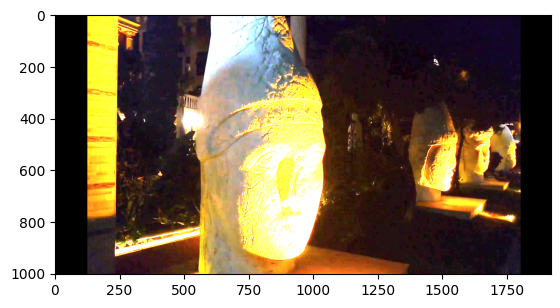

In [5]:
import numpy as np

img_2d.dump('img_dump')

img_load = np.load('img_dump',allow_pickle=True)
plt.imshow(img_load)

#### 2. OpenCV. Drawing модуль
1. Изобразите квадрат, прямоугольник и круг. Закрасьте их полностью
2. Изобразите фигуру произвольной формы (например, неправильный многоугольник)
3. Загрузите любую фотографию и нарисуйте любую фигуру поверх нее (например, обведите мордочку котика в прямоугольник)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


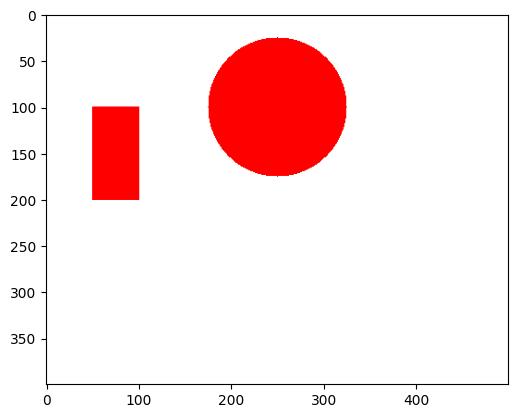

In [6]:
paint = np.ones((400,500,3))
red = (255,0,0)
cv2.rectangle(paint,(50,100),(100,200),red,cv2.FILLED)
cv2.circle(paint,(250,100),75,red,cv2.FILLED)
plt.imshow(paint)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


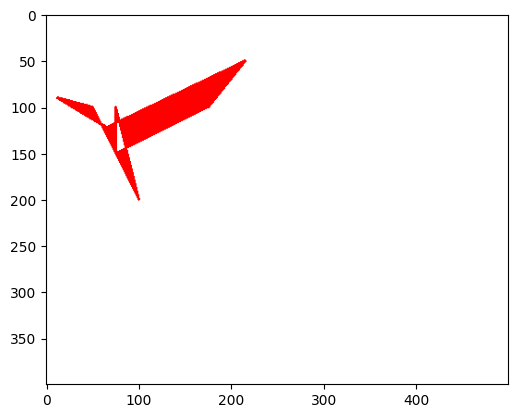

In [7]:
import datetime 
paint = np.ones((400,500,3))
red = (255,0,0)
points = np.array([[[50,100],[100,200],[75,100],[75,150],[175,100],[215,50],[65,122],[12,90]]])
cv2.polylines(paint,points,isClosed=True,color=red,thickness = 2)
# cv2.polylines(paint,[[50,100],[100,200],[75,100],[75,150],[175,100],[215,50],[65,122],[12,90]],isClosed=True,color=(255,0,0),lineType= 2)
cv2.fillPoly(paint, points, red)
plt.imshow(paint);

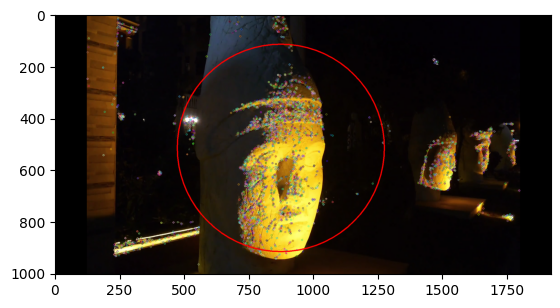

In [8]:
sift = cv2.SIFT_create()
kp = sift.detect(img,None)
sift_image = cv2.drawKeypoints(img,kp,cv2.imread('img2.png',cv2.IMREAD_GRAYSCALE))

cv2.circle(sift_image,(int((min([i.pt for i in kp])[0] + max([i.pt for i in kp])[0])/2.2), int((min([i.pt for i in kp])[1] + max([i.pt for i in kp])[1])/1.8)),400,red,3)
plt.imshow(sift_image)